---
---
### 選擇模型

#### 調整參數

我們對這個效能滿意嗎？也許更高的階數能進一步提升效能！但階數過高又會怎樣呢？現在我們可能需要回去調整我們的模型和參數，來探索更高階多項式的效果。這將很好地引入關於過度擬合的討論。

我們可以使用迴圈來完成以下事項：

1. 創建不同階數的多項式X數據
2. 將該多項式數據分割成訓練集和測試集
3. 在訓練數據上進行擬合
4. 回報訓練和測試結果的指標
5. 繪製這些結果並探討過度擬合

這段描述是要進行一個循環實驗，通過不斷提高多項式的階數，來觀察模型在訓練集和測試集上的表現，並透過繪圖來看過度擬合的情況。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("./Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
X = df.drop("sales",axis=1)
y = df["sales"]

polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)
pol_features = polynomial_converter.fit_transform(X)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(pol_features,y,test_size=0.3,random_state=101)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

test_pred = model.predict(X_test)
MAE = mean_absolute_error(y_test,test_pred)
MSE = mean_squared_error(y_test,test_pred)
print(f"MSE:{MSE}\nMAE:{MAE}")

MSE:0.44175055104035904
MAE:0.48967980448037096


In [22]:
train_rmse_errors = []
test_rmse_errors = []
for d in range(1,10):
    polynomial_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)
    X_train,X_test,y_train,y_test = train_test_split(poly_features,y,test_size=0.3,random_state=101)
    model = LinearRegression(fit_intercept=True)
    model.fit(X_train,y_train)
    train_pred = model.predict(X_train)
    test_pred =  model.predict(X_test)
    train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
    test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))
    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)


In [23]:
train_rmse_errors


[1.734594124329376,
 0.5879574085292232,
 0.4339344356902066,
 0.35170836883993517,
 0.2509342951990972,
 0.19940660520798886,
 5.421526785539996,
 0.14202305096575807,
 0.16722016522462252]

In [24]:
test_rmse_errors

[1.5161519375993877,
 0.6646431757269152,
 0.5803286825156331,
 0.5077742623309994,
 2.5758247707699113,
 4.490840128985557,
 1381.247040053768,
 4450.02249855719,
 95899.77715376193]

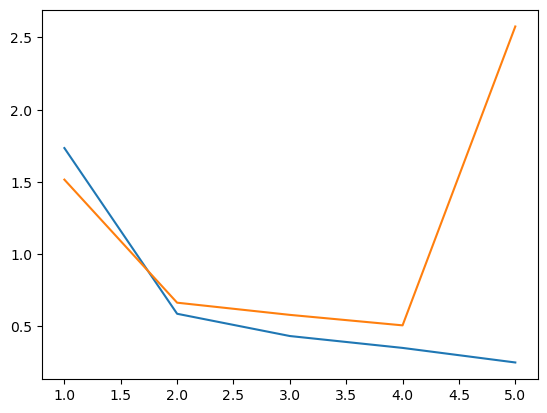

In [28]:
plt.plot(range(1,6),train_rmse_errors[:5],label="train")
plt.plot(range(1,6),test_rmse_errors[:5],label="test")

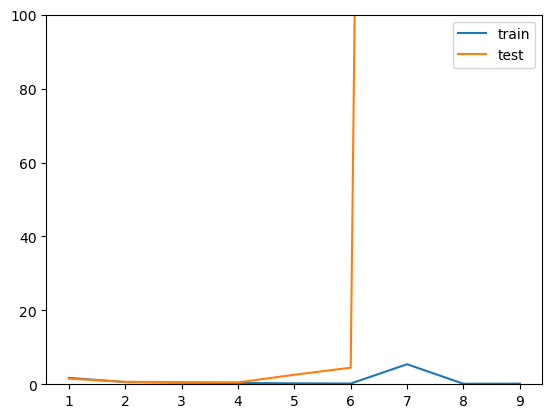

In [29]:
plt.plot(range(1,10),train_rmse_errors,label="train")
plt.plot(range(1,10),test_rmse_errors,label="test")
plt.ylim(0,100)
plt.legend()

In [36]:
final_poly_converter = PolynomialFeatures(degree=3,include_bias=False)

In [37]:
final_model = LinearRegression()


In [38]:
poly_features = final_poly_converter.fit_transform(X)

X_train,X_test,y_train,y_test = train_test_split(poly_features,y,test_size=0.3,random_state=101)

final_model.fit(X_train,y_train)

LinearRegression()

In [39]:
train_pred = final_model.predict(X_train)
test_pred = final_model.predict(X_test)
MAE = mean_absolute_error(y_test,test_pred)
MSE = mean_squared_error(y_test,test_pred)
print(f"MSE:{MSE}\nMAE:{MAE}")


MSE:0.3367813797503304
MAE:0.4127516085297478


In [40]:
train_pred = final_model.predict(X_train)
test_pred = final_model.predict(X_test)
MAE = mean_absolute_error(y_test,test_pred)
MSE = mean_squared_error(y_test,test_pred)
print(f"MSE:{MSE}\nMAE:{MAE}")

MSE:0.3367813797503304
MAE:0.4127516085297478


In [41]:
from joblib import dump,load
dump(final_model,"sales_poly_model.joblib")


['sales_poly_model.joblib']

In [42]:
dump(final_poly_converter,"poly_converter.joblib")

['poly_converter.joblib']

In [43]:
loaded_poly = load("poly_converter.joblib")
loaded_model = load("sales_poly_model.joblib")


In [ ]:
compile = [[149,22,12]]
compile_poly =  loaded_poly.transform(compile)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [45]:
compile_poly

array([[1.490000e+02, 2.200000e+01, 1.200000e+01, 2.220100e+04,
        3.278000e+03, 1.788000e+03, 4.840000e+02, 2.640000e+02,
        1.440000e+02, 3.307949e+06, 4.884220e+05, 2.664120e+05,
        7.211600e+04, 3.933600e+04, 2.145600e+04, 1.064800e+04,
        5.808000e+03, 3.168000e+03, 1.728000e+03]])

In [46]:
loaded_model.predict(compile_poly)

array([14.62125519])

## Model

L1 和 L2 正則化是兩種常見的正則化技術，用於防止模型過擬合並提高模型的泛化能力。它們在正則化項的計算方式上有所不同，從而對模型的影響也不同。

### L1 正則化（Lasso 回歸）

L1 正則化通過在損失函數中加入模型參數的絕對值之和來進行正則化。其損失函數為：

$[ \text{Loss} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \alpha \sum_{j=1}^{p} |\beta_j| ]$

其中：
- $( y_i )$ 是實際值。
- $( \hat{y}_i )$ 是預測值。
- $( \beta_j )$ 是模型的回歸係數。
- $( \alpha )$ 是正則化強度的參數。

#### 特點：
- **特徵選擇**：L1 正則化可以使一些回歸係數變為零，從而實現特徵選擇。這對於高維數據中特徵數量多於樣本數的情況特別有用。
- **稀疏性**：L1 正則化會產生稀疏的模型，即只有少數幾個特徵會被選擇，而大部分特徵的係數為零。

### L2 正則化（Ridge 回歸）

L2 正則化通過在損失函數中加入模型參數的平方和來進行正則化。其損失函數為：

$[ \text{Loss} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \alpha \sum_{j=1}^{p} \beta_j^2 ]$

其中：
- $( y_i )$ 是實際值。
- $( \hat{y}_i )$ 是預測值。
- $( \beta_j )$ 是模型的回歸係數。
- $( \alpha )$ 是正則化強度的參數。

#### 特點：
- **平滑性**：L2 正則化不會使係數變為零，而是讓所有的係數都趨向於較小的值。這有助於防止過擬合，並使模型更加平滑。
- **共線性處理**：L2 正則化對多重共線性問題有較好的處理效果，因為它能夠平滑地縮小回歸係數。

### 比較

- **正則化項**：
  - L1 正則化：$(\alpha \sum_{j=1}^{p} |\beta_j|)$
  - L2 正則化：$(\alpha \sum_{j=1}^{p} \beta_j^2)$
  
- **特徵選擇**：
  - L1 正則化：可以進行特徵選擇，產生稀疏模型。
  - L2 正則化：不能進行特徵選擇，但能平滑地縮小回歸係數。

- **應用場景**：
  - L1 正則化：適合特徵數量多且希望進行特徵選擇的情況。 
              幫你挑出「誰才是真正重要的」，不重要的直接踢掉。
              
  - L2 正則化：適合處理多重共線性問題，並希望所有特徵都對模型有貢獻的情況。
              大家都有貢獻，只是力道被壓小（防止共線性係數亂飆）。

通過這些代碼和解釋，可以更好地理解 L1 和 L2 正則化的區別和應用場景。

### L1 正則化的範例

L1 正則化（Lasso 回歸）
幫你挑出「誰才是真正重要的」，不重要的直接踢掉。
來減少無相關特徵，並比較不使用 L1 正則化和使用 L1 正則化的模型性能。

In [55]:
import numpy as np
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
np.random.seed(42)
X,y = make_regression(n_samples=100,n_features=10,noise =10,random_state = 42)
print(X.shape)
# 添加20個不相關的特徵
X = np.hstack([X,np.random.randn(100,20)])
print(X.shape)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
print(f"MSE:{mse}")
print(f"coef_:{model.coef_}")
#102

(100, 10)
(100, 30)
MSE:176.42544323621857
coef_:[ 1.86152601e+01  5.60286490e+01  3.17357805e+00  6.24260862e+01
  9.27602895e+01  6.97597908e+01  8.33919942e+01  8.43747551e+00
  3.32648137e+00  6.98579993e+01  8.10967410e-01 -5.19313990e-02
  2.32945143e-01 -6.33442802e-01 -2.01294040e+00  7.11382164e-01
 -5.34978296e-01  1.10023675e+00 -5.72338086e-01 -1.84143496e-01
 -1.28005664e+00  1.42118542e+00  5.14756687e-02 -2.74431452e+00
 -1.92306794e+00 -1.78688773e+00  1.54404528e-01 -1.76629864e+00
  2.31370622e+00 -1.42360135e+00]


In [60]:
lasso = Lasso(alpha=0.3)
lasso.fit(X_train,y_train)
y_pred_lasso =lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test,y_pred_lasso)
print(f"MSE:{mse_lasso}")


MSE:159.06667378029192


## 比較不使用 L2 正則化和使用 L2 正則化（Ridge 回歸）的模型性能

In [61]:
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error

In [66]:
np.random.seed(42)
X,y = make_regression(n_samples=100,n_features=10,noise=0.1,random_state=42)
print(X.shape)
X[:,1] = X[:,0] + np.random.normal(scale=0.01,size=100)
X[:,2] = X[:,0] - np.random.normal(scale=0.01,size=100)
print(X.shape)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
print(f"MSE:{mse}")
print(f"coef_:{model.coef_}")

ridge = Ridge(alpha= 0.3)
ridge.fit(X_train,y_train)
y_pred_ridge = ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test,y_pred_ridge)
print(f"MSE:{mse_ridge}")
print(f"coef_:{ridge.coef_}")


(100, 10)
(100, 10)
MSE:4138.155390347969
coef_:[-348.97361351 -413.24133264  776.7615637    56.68992678   93.75953369
   63.90743713   95.01631245   17.56965283    4.04604142   75.04900738]
MSE:3961.001585637486
coef_:[ 1.78253414 -4.07603893 17.6021492  55.82607708 94.32836973 64.4655992
 94.10277709 17.44559902  3.07391999 75.32882627]


## Cross Validation with cross_val_score
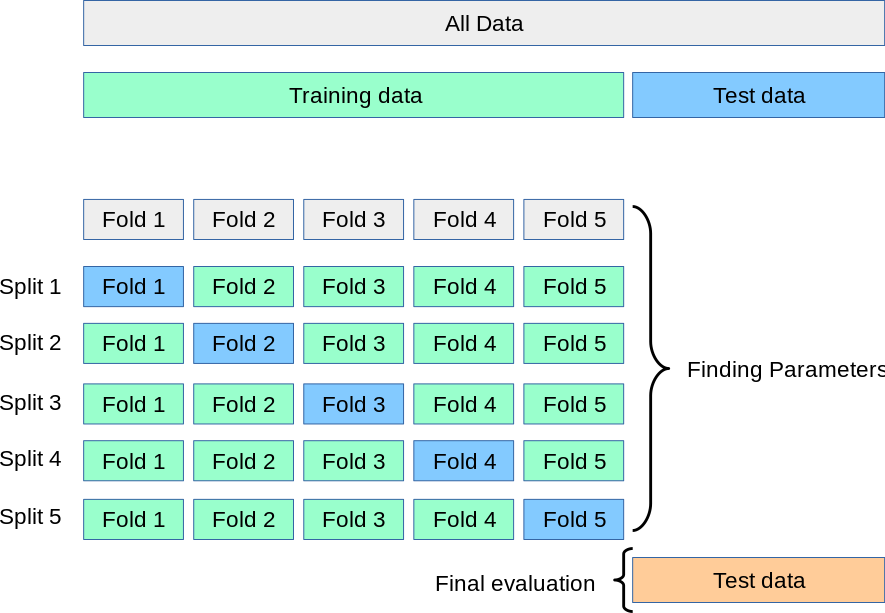

In [67]:
df = pd.read_csv("./Advertising.csv")
X = df.drop("sales",axis=1)
y = df["sales"]

In [69]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [74]:
model = Ridge(alpha=100)
from sklearn.model_selection import cross_val_score
score = cross_val_score(model,X_train,y_train,scoring="neg_mean_squared_error",cv=5)
score.mean()*-1

8.215396464543607